In [5]:
# function sir_ode2(du,u,p,t)
#     S,I,R = u
#     b,g = p
#     du[1] = -b*S*I
#     du[2] = b*S*I-g*I
#     du[3] = g*I
# end
# parms = [0.1,0.05]
# init = [0.99,0.01,0.0]
# tspan = (0.0,200.0)
# sir_prob2 = ODEProblem(sir_ode2,init,tspan,parms)
# sir_sol = solve(sir_prob2,saveat = 0.1)

In [6]:
# plot(sir_sol, xaxis= "Time", yaxis= "number", label = ["dS, dI, dR"])

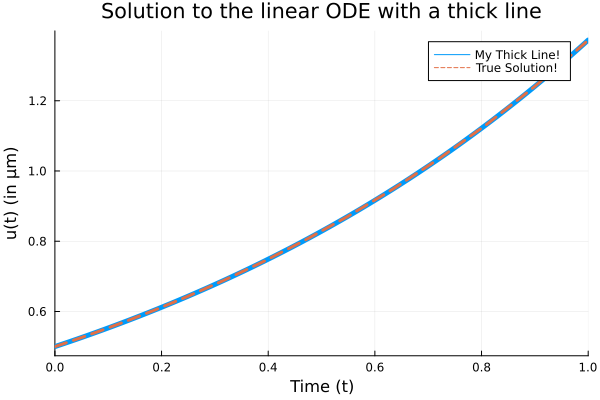

In [7]:
using DifferentialEquations
f(u,p,t) = 1.01*u
u0 = 1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

using Plots
plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!") # legend=false
plot!(sol.t, t->0.5*exp(1.01t),lw=3,ls=:dash,label="True Solution!")

In [8]:
function sis_ode(du,u,p,t)
    SH,IH,SL,IL = u
    betaHH,betaHL,betaLH,betaLL,gamma=p
    du[1]=-(betaHH*IH+betaHL*IL)*SH+gamma*IH
    du[2]=+(betaHH*IH+betaHL*IL)*SH-gamma*IH
    du[3]=-(betaLH*IH+betaLL*IL)*SL+gamma*IL
    du[4]=+(betaLH*IH+betaLL*IL)*SL-gamma*IL
end

sis_ode (generic function with 1 method)

In [9]:
parms =[10,0.1,0.1,1,1]
init=[0.19999,0.00001,0.799,0.001]
tspan=tspan = (0.0,15.0)

(0.0, 15.0)

In [10]:
sis_prob = ODEProblem(sis_ode,init,tspan,parms)
sis_sol = solve(sis_prob,saveat=0.1)

retcode: Success
Interpolation: 1st order linear
t: 151-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮
 13.9
 14.0
 14.1
 14.2
 14.3
 14.4
 14.5
 14.6
 14.7
 14.8
 14.9
 15.0
u: 151-element Vector{Vector{Float64}}:
 [0.19999, 1.0e-5, 0.799, 0.001]
 [0.19998686569142285, 1.3134308577147971e-5, 0.799019807006262, 0.0009801929937381223]
 [0.19998344308576305, 1.6556914236958096e-5, 0.7990391920816711, 0.0009608079183289639]
 [0.19997970098244397, 2.0299017556046098e-5, 0.7990581613316069, 0.0009418386683931482]
 [0.19997560516722707, 2.4394832772938123e-5, 0.7990767204868054, 0.0009232795131945503]
 [0.19997111751660585, 2.8882483394162185e-5, 0.7990948748544864, 0.0009051251455136423]
 [0.19996619578505184, 3.380421494815943e-5, 0.7991126293074815, 0.0008873706925185745]
 [0.19996079360501473, 3.920639498528369e-5, 0.7991299882842349, 0.0008700117157651761]
 [0.19995485986539335, 4.514013460666193e-5, 0.7991469557521774, 0.00085

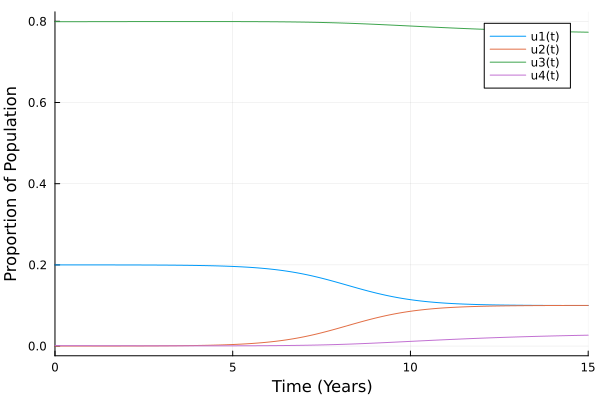

In [11]:
plot(sis_sol,xlabel="Time (Years)",ylabel="Proportion of Population")

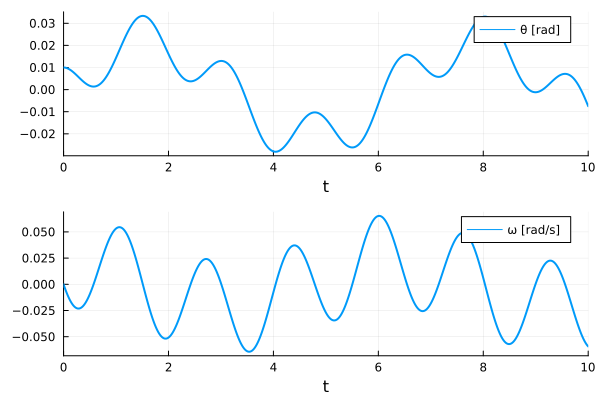

In [12]:
using DifferentialEquations
using Plots

l = 1.0                             # length [m]
m = 1.0                             # mass [kg]
g = 9.81                            # gravitational acceleration [m/s²]

function pendulum!(du,u,p,t)
    du[1] = u[2]                    # θ'(t) = ω(t)
    du[2] = -3g/(2l)*sin(u[1]) + 3/(m*l^2)*p(t) # ω'(t) = -3g/(2l) sin θ(t) + 3/(ml^2)M(t)
end

θ₀ = 0.01                           # initial angular deflection [rad]
ω₀ = 0.0                            # initial angular velocity [rad/s]
u₀ = [θ₀, ω₀]                       # initial state vector
tspan = (0.0,10.0)                  # time interval

M = t->0.1sin(t)                    # external torque [Nm]

prob = ODEProblem(pendulum!,u₀,tspan,M)
sol = solve(prob)

plot(sol,linewidth=2,xaxis="t",label=["θ [rad]" "ω [rad/s]"],layout=(2,1))

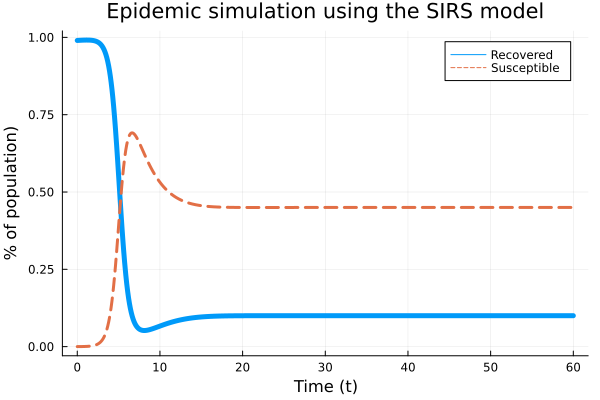

In [13]:
function sirs(; beta, gamma, delta)
    function f!(du,u,p,t)
        du[1] = gamma * (1 - u[1] - u[2]) - beta * u[1] * u[2]
        du[2] = beta * u[1] * u[2] - gamma * u[2]
    end

    u0 = [0.99; 0.0001]
    tspan = (0.0,60.0)
    prob = ODEProblem(f!,u0,tspan)
    u = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)   # Fifth order Tsitouras method
    u0 = [ elem[1] for elem in u.u]
    u1 = [ elem[2] for elem in u.u]

    plot(u.t, u0,linewidth=5,title="Epidemic simulation using the SIRS model",
         xaxis="Time (t)",yaxis="% of population)",label="Recovered") # legend=false
    plot!(u.t, u1,lw=3,ls=:dash,label="Susceptible")
end

sirs( beta = 2.0, gamma = 0.2, delta = 0.1)

In [15]:
# # Set the required model parameters for the SIRS model with two levels of transmission - Within and between households
# N = 10; # Household size - Change to 10 for final analysis
# betaHH = 6; # Within household transmission parameter
# betaG = 1; # Population wide transmission
# gamma = 1; # Rate of recovery from infection
# tau = 1; # Rate of loss of protection
# params = [betaHH,gamma,tau,betaG,N]; # Put all the parameters together
# time = (0.0, 30.0) # Simulation time - note it defined as a float
# dim = dim = 0.5*(N+1)*(N+2); # Number of possible configurations - works for three epidemiological classes
# y0 = vec(zeros(1,dim)); # Initial condition vector
# y0[end-1] = 0.00000001;
# y0[end] = 0.99999999;

LoadError: MethodError: no method matching zeros(::Int64, ::Float64)
[0mClosest candidates are:
[0m  zeros([91m::Union{Integer, AbstractUnitRange}...[39m) at array.jl:583

In [16]:
# function hhTransitions(N,dim)
#     # Function to generate transition matrices for household model
#     # Input: N is the household size
    
#     # Initialize things
#     Qinf = zeros(dim,dim);
#     Qrec = zeros(dim,dim);
#     Qext = zeros(dim,dim);
#     Qwane = zeros(dim,dim);
#     dataI = Array{Int64}(zeros(dim,3))
#     m = 0;
#     I = Array{Int64}(zeros(N+1,N+1))
    
#     # To help remember where to store the variables
#     for ss = 0:N
#         for ii = 0:(N-ss)
#             m = m + 1;
#             I[ss+1,ii+1] = m
#         end
#     end
    
#     # Describe the epidemiological transitions
    
#     # Counter for susceptibles
#     for ss = 0:N
#         # Counter for infecteds
#         for ii = 0:(N-ss) 
#             # If susceptibles and infecteds are more than 1, then infection within the household can occur
#             if (ss > 0 && ii > 0) 
#                 Qinf[I[ss+1,ii+1],I[ss,ii+2]] = ii*ss/(N-1);
#             end
            
#             # If infecteds are more than 1, recovery can occur
#             if ii > 0
#                 # Rate of recovery
#                 Qrec[I[ss+1,ii+1],I[ss+1,ii]] = ii; 
#             end
            
#             # For external infection - just keep track of susceptibles
#             if ss > 0           
#                 # Rate of within household infection
#                 Qext[I[ss+1,ii+1],I[ss,ii+2]] = ss;           
#             end
            
#             # Loss of protection hence becoming susceptible again. Possible if N-ss-ii = rr > 0 
#             if (N-ss-ii) > 0
#                 # Rate of loss of protection
#                 Qwane[I[ss+1,ii+1],I[ss+2,ii+1]] = N-ss-ii;
#             end
            
#             # Store the relevant indices to help identify the household configurations
#             dataI[I[ss+1,ii+1],:] = [ss, ii, N-ss-ii];
#         end
#     end
    
#     Qinf = Qinf - diagm(vec(sum(Qinf,2)),0);
#     Qrec = Qrec - diagm(vec(sum(Qrec,2)),0);
#     Qext = Qext - diagm(vec(sum(Qext,2)),0);
#     Qwane = Qwane - diagm(vec(sum(Qwane,2)),0);
    
#     # Return
#     return Qinf, Qrec, Qext, Qwane, dataI
# end
# Qinf, Qrec, Qext, Qwane, dataI = hhTransitions(N,dim);

LoadError: MethodError: no method matching zeros(::Float64, ::Float64)

In [17]:
# x,t = sir(s0 = 0.99, beta = 0.5, gamma = gamma_val, r0 = r0_val)
# plot(t, x,linewidth=5,title="Epidemic simulation using the SIR model", linecolor="steelblue",
#         xaxis="Time (t)",yaxis="% of population that is infected",label="Baseline of beta = 0.5") # legend=false

# count = 0.1
# for i in 1.0: 0.5 :3.0
#     x,t = sir(s0 = 0.99, beta = i, gamma = gamma_val, r0 = r0_val)
#     #print(t)
#     a = plot!(t, x,lw=3,label=i, linecolor=cgrad(g)[count]) # legend=false
#     count += 0.1
# end
# display(a)

LoadError: UndefVarError: gamma_val not defined

In [ ]:
# # Estimates for gamma and beta for COVID obtained from https://arxiv.org/pdf/2002.06563.pdf
# # Epidemic analysis of COVID-19 in China by dynamical modeling
# # Liangrong Peng, Wuyue Yang, Dongyan Zhang, Changjing Zhuge, Liu Hong
# # medRxiv 2020.02.16.20023465; doi: https://doi.org/10.1101/2020.02.16.20023465
# # Estimate for gamma for flu was not available

# beta_val(;R0, gamma) = R0 * gamma
# cv = beta_val(R0 = 2.2, gamma = 0.5) 
# fl = beta_val(R0 = 1.3, gamma = 0.5)

# sir(s0 = 0.99, beta = cv, gamma = 0.5, r0 = 0.0001, title="Coronavirus - SIR simulation with estimated parameters")

UndefVarError: UndefVarError: sir not defined

In [19]:
# using Optim

# # c is the mean degree of the random network
# c_baseline = 1.5
# c_end = 4.0

# # Newton's solve 
# function solve_S(;c,phi)
#     f(S) = 1 - exp(-phi*c*S) - S# Function
#     df(S) = c * phi * exp(-phi * c * S) - 1

#     S_iter = 0.5
#     for i in 1 : 300
#         delS = -f(S_iter) / df(S_iter)
#         S_iter += delS 
#     end
    
#     return(S_iter)
# end

# r = [ solve_S(c = c_baseline, phi = i) for i in 0:0.01:1]
# plot([0: 0.01: 1], r,linewidth=5,title="Outbreak size for varying 'mean degree' of the network", linecolor="steelblue",
#          xaxis="Phi or the transmission probability",yaxis="% of population that is infected",label="Baseline of c = 1.5") # legend=false

# count = 0.1
# for c in c_baseline + 0.5: 0.5: c_end
#     r = [ solve_S(c = c, phi = i) for i in 0 : 0.01 : 1]
#     a = plot!([0: 0.01: 1], r, lw=3, label=c, linecolor=cgrad(g)[count]) # legend=false
#     count += 0.1
# end


In [20]:
function lorenz(u,p,t)
    dx = 10.0*(u[2]-u[1])
    dy = u[1]*(28.0-u[3]) - u[2]
    dz = u[1]*u[2] - (8/3)*u[3]
    [dx,dy,dz]
   end

lorenz (generic function with 1 method)

In [21]:
using DifferentialEquations, BenchmarkTools
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz,u0,tspan)
@benchmark solve(prob,Tsit5())

BenchmarkTools.Trial: 592 samples with 1 evaluation.
 Range (min … max):  2.805 ms … 114.057 ms  ┊ GC (min … max):  0.00% … 88.54%
 Time  (median):     5.909 ms               ┊ GC (median):     0.00%
 Time  (mean ± σ):   8.397 ms ±  10.198 ms  ┊ GC (mean ± σ):  15.81% ± 16.11%

  █▄▃▇▇▄▄▅▃▁▁                                                  
  ███████████▆█▆▄▅▇▆▅▅▆▅▄▄▁▁▆▁▄▄▄▁▄▄▆▇▅▅▅▆▁▄▄▄▄▁▄▅▁▁▁▁▁▁▁▄▁▁▄ ▇
  2.8 ms       Histogram: log(frequency) by time      46.3 ms <

 Memory estimate: 7.82 MiB, allocs estimate: 101102.

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


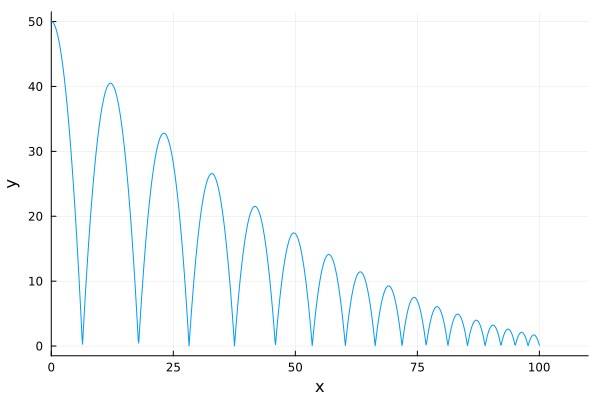

In [22]:
using OrdinaryDiffEq, Plots

function ball!(du,u,p,t)
    du[1] = u[2]
    du[2] = 0.0
    du[3] = u[4]
    du[4] = -p[1]
end

ground_condition(u,t,integrator) = u[3]
ground_affect!(integrator) = integrator.u[4] = -integrator.p[2] * integrator.u[4]
ground_cb = ContinuousCallback(ground_condition, ground_affect!)

u0 = [0.0,2.0,50.0,0.0]
tspan = (0.0,50.0)
p = [9.807, 0.9]

prob = ODEProblem(ball!,u0,tspan,p)
sol = solve(prob,Tsit5(),callback=ground_cb)
plot(sol, vars=(1,3), label = nothing, xlabel="x", ylabel="y")

\begin{align} 
    \frac{dx}{dt} &= \sigma (y - x)\\ 
    \frac{dy}{dt} &= x (\rho - z) -y\\
    \frac{dz}{dt} &= xy - \beta z 
\end{align} 

In [23]:
using DifferentialEquations, Plots
function lorenz!(du,u,p,t)
    σ,ρ,β = p
    du[1] = σ*(u[2]-u[1])
    du[2] = u[1]*(ρ-u[3]) - u[2]
    du[3] = u[1]*u[2] - β*u[3]
end

lorenz! (generic function with 1 method)

\begin{align}
    \frac{ds_(t)}{dt} = -\beta <k>s_(t)i(t) + \gamma r_(t) \\
    \frac{de_(t)}{dt} = \beta <k> s_(t)i(t) - \beta <k> s(t - \tau)i(t - \tau)\\
\end{align}

In [24]:
function sir_ode2(du,u,p,t)
    S,I,R = u
    b,g = p
    du[1] = -b*S*I
    du[2] = b*S*I-g*I
    du[3] = g*I
end
parms = [0.1,0.05]
init = [0.99,0.01,0.0]
tspan = (0.0,200.0)
sir_prob2 = ODEProblem(sir_ode2,init,tspan,parms)
sir_sol = solve(sir_prob2,saveat = 0.1)

retcode: Success
Interpolation: 1st order linear
t: 2001-element Vector{Float64}:
   0.0
   0.1
   0.2
   0.3
   0.4
   0.5
   0.6
   0.7
   0.8
   0.9
   1.0
   1.1
   1.2
   ⋮
 198.9
 199.0
 199.1
 199.2
 199.3
 199.4
 199.5
 199.6
 199.7
 199.8
 199.9
 200.0
u: 2001-element Vector{Vector{Float64}}:
 [0.99, 0.01, 0.0]
 [0.9899007620439206, 0.01004911526404097, 5.012269203835053e-5]
 [0.9898010467485492, 0.010098461713420163, 0.00010049153803066705]
 [0.9897008519670815, 0.010148040336446743, 0.00015110769647183207]
 [0.989600175544873, 0.01019785212459509, 0.00020197233053187715]
 [0.9894990153190228, 0.010247898072564106, 0.0002530866084130026]
 [0.9893973691183536, 0.010298179178280388, 0.00030445170336601107]
 [0.9892952347634115, 0.01034869644289822, 0.0003560687936903061]
 [0.9891926100664665, 0.010399450870799583, 0.00040793906273389383]
 [0.9890894928315125, 0.01045044346959414, 0.00046006369889337886]
 [0.9889858808542668, 0.010501675250119254, 0.000512443895613971]
 [0.98888

In [25]:
u0 = [1.0,0.0,0.0]

3-element Vector{Float64}:
 1.0
 0.0
 0.0

In [26]:
p = (10,28,8/3)

(10, 28, 2.6666666666666665)

In [27]:
tspan = (0.0,100.0)

prob = ODEProblem(lorenz!,u0,tspan,p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 3-element Vector{Float64}:
 1.0
 0.0
 0.0

In [28]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 1263-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624077544510573
   0.009058075635317072
   0.01695646895607931
   0.02768995855685593
   0.04185635042021763
   0.06024041165841079
   0.08368541255159562
   0.11336499649094857
   0.1486218182609657
   0.18703978481550704
   ⋮
  99.05535949898116
  99.14118781914485
  99.22588252940076
  99.30760258626904
  99.39665422328268
  99.49536147459878
  99.58822928767293
  99.68983993598462
  99.77864535713971
  99.85744078539504
  99.93773320913628
 100.0
u: 1263-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799208e-8]
 [0.9961045497425811, 0.010965399721242457, 2.146955365838907e-6]
 [0.9693591634199452, 0.08977060667778931, 0.0001438018342266937]
 [0.9242043615038835, 0.24228912482984957, 0.001046162

In [29]:
sol.t[10],sol[10]

(0.08368541255159562, [1.088863826836895, 2.052326595543049, 0.0740257368585531])

In [30]:
sol[2,10]

2.052326595543049

In [31]:
A = Array(sol)

3×1263 Matrix{Float64}:
 1.0  0.999643     0.996105    0.969359     …   8.10973   4.95863   3.80201
 0.0  0.000998805  0.0109654   0.0897706        3.24951   2.19492   2.78702
 0.0  1.78143e-8   2.14696e-6  0.000143802     31.9705   26.9484   23.4206

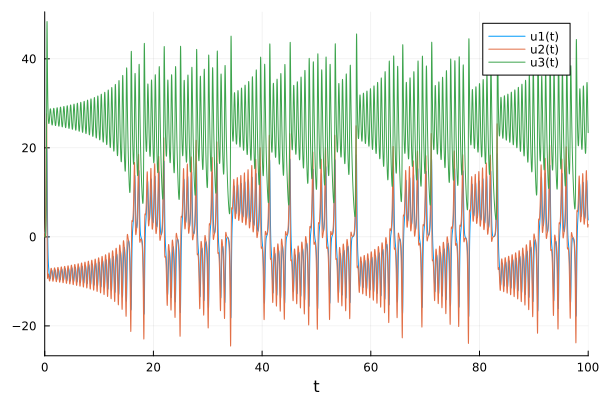

In [32]:
plot(sol)

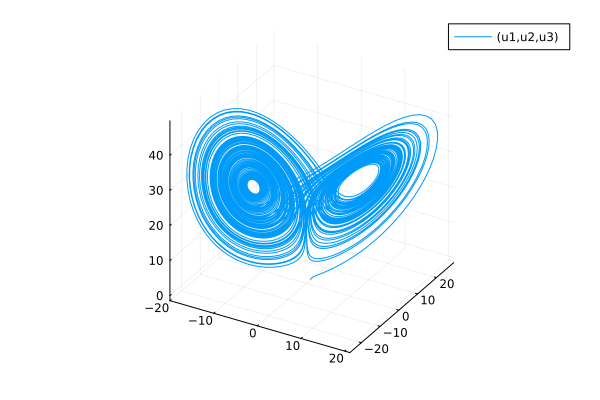

In [33]:
plot(sol, vars=(1, 2, 3))

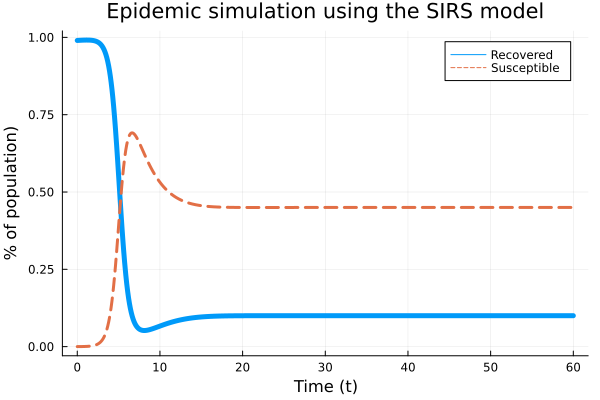

In [34]:
function sirs(; beta, gamma, delta)
    function f!(du,u,p,t)
        du[1] = gamma * (1 - u[1] - u[2]) - beta * u[1] * u[2]
        du[2] = beta * u[1] * u[2] - gamma * u[2]
    end

    u0 = [0.99; 0.0001]
    tspan = (0.0,60.0)
    prob = ODEProblem(f!,u0,tspan)
    u = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)   # Fifth order Tsitouras method
    u0 = [ elem[1] for elem in u.u]
    u1 = [ elem[2] for elem in u.u]

    plot(u.t, u0,linewidth=5,title="Epidemic simulation using the SIRS model",
         xaxis="Time (t)",yaxis="% of population)",label="Recovered") # legend=false
    plot!(u.t, u1,lw=3,ls=:dash,label="Susceptible")
end

sirs( beta = 2.0, gamma = 0.2, delta = 0.1)

In [36]:
# function SIRS!(beta, gamma)
#     function f!(du, u, t)
#         du[1] = gamma * u[2] - beta * 
#     end
# end

In [37]:
# function coordinates(x, y, z)
#     if x == 0.0 && z == 0.0 && y == 0.0
#         # select appropriate condition from list below so this code works
#       println("origin")
#     else
#       println("($x, $y, $z)")
#     end
#   end

In [ ]:
# coordinates(0,0,0)

origin


In [38]:
using DifferentialEquations


function sir_ode!(du, u, p, t)  # ! since modifies du -- in-place updating (can have better performance)
    
    # unpack variables and parameters:
    S, I, R = u
    β, γ = p   # \beta
    
    # define differential equations:
    dS = -β*S*I
    dI = +β*S*I - γ*I
    dR = +γ*I
    
    du .= (dS, dI, dR)   # copy the values into the vector du; note the `.`
end

sir_ode! (generic function with 1 method)

In [39]:
β = 0.1
γ = 0.05

parameters = [β, γ]

S₀ = 0.99   # write subscript 0 as S\_0
I₀ = 0.01
R₀ = 0.0

initial_values = [S₀, I₀, R₀]

time_span = [0.0, 200.0]  # initial and final time

# set up problem:
problem = ODEProblem(sir_ode!, initial_values, time_span, parameters)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 200.0)
u0: 3-element Vector{Float64}:
 0.99
 0.01
 0.0

In [40]:
# solve problem:
solution = solve(problem, saveat = 0.1)

retcode: Success
Interpolation: 1st order linear
t: 2001-element Vector{Float64}:
   0.0
   0.1
   0.2
   0.3
   0.4
   0.5
   0.6
   0.7
   0.8
   0.9
   1.0
   1.1
   1.2
   ⋮
 198.9
 199.0
 199.1
 199.2
 199.3
 199.4
 199.5
 199.6
 199.7
 199.8
 199.9
 200.0
u: 2001-element Vector{Vector{Float64}}:
 [0.99, 0.01, 0.0]
 [0.9899007620439206, 0.01004911526404097, 5.012269203835053e-5]
 [0.9898010467485492, 0.010098461713420163, 0.00010049153803066705]
 [0.9897008519670815, 0.010148040336446743, 0.00015110769647183207]
 [0.989600175544873, 0.01019785212459509, 0.00020197233053187715]
 [0.9894990153190228, 0.010247898072564106, 0.0002530866084130026]
 [0.9893973691183536, 0.010298179178280388, 0.00030445170336601107]
 [0.9892952347634115, 0.01034869644289822, 0.0003560687936903061]
 [0.9891926100664665, 0.010399450870799583, 0.00040793906273389383]
 [0.9890894928315125, 0.01045044346959414, 0.00046006369889337886]
 [0.9889858808542668, 0.010501675250119254, 0.000512443895613971]
 [0.98888

In [41]:
typeof(solution)

OrdinaryDiffEq.ODECompositeSolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, FunctionWrappersWrappers.FunctionWrappersWrapper{Tuple{FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{Float64}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{Float64}, Vector{Float64}, ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}}, FunctionWrappers.FunctionWrapper{Nothing, Tupl

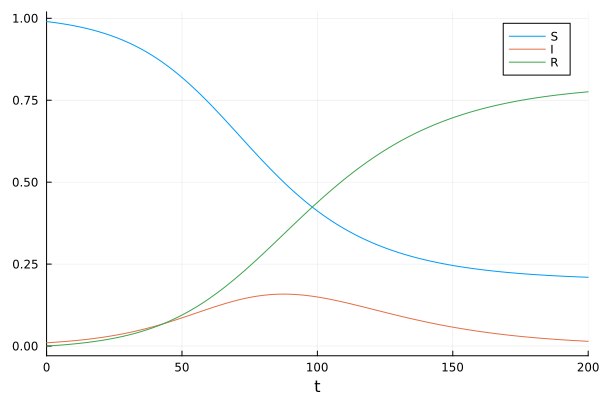

In [42]:
plot(solution, label=["S" "I" "R"])  # row vector of labels

In [45]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
download(url, "covid_data.csv")

"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [46]:
download(url, "covid_data.csv")

"covid_data.csv"

In [47]:
readdir()

6-element Vector{String}:
 "covid_data.csv"
 "experiment.jl"
 "experiments.ipynb"
 "juliaExperiment.ipynb"
 "new.ipynb"
 "new.jl"

In [54]:
using CSV, DataFrames
data = CSV.read("covid_data.csv", DataFrame)

Row,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,⋯
,String?,String,Float64?,Float64?,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,⋯
1,missing,Afghanistan,33.9391,67.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5,5,5,5,8,8,8,8,11,11,11,14,20,25,26,26,26,24,24,34,40,42,74,80,91,106,114,114,166,192,235,269,270,299,337,367,423,444,521,521,555,607,665,770,794,845,908,933,996,1026,1092,1176,1226,1330,1463,⋯
2,missing,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,⋯
3,missing,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,⋯
4,missing,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,⋯
5,missing,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,⋯
6,missing,Antarctica,-71.9499,23.347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯
7,missing,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,21,23,23,23,23,23,23,23,23,23,24,24,24,24,24,⋯
8,missing,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892,⋯
9,missing,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,4,8,18,26,52,78,84,115,136,160,194,235,249,265,290,329,407,424,482,532,571,663,736,770,822,833,853,881,9

In [55]:
rename!(data, 1 => "province", 2 => "country")

Row,province,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,⋯
,String?,String,Float64?,Float64?,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,⋯
1,missing,Afghanistan,33.9391,67.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5,5,5,5,8,8,8,8,11,11,11,14,20,25,26,26,26,24,24,34,40,42,74,80,91,106,114,114,166,192,235,269,270,299,337,367,423,444,521,521,555,607,665,770,794,845,908,933,996,1026,1092,1176,1226,1330,1463,⋯
2,missing,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,⋯
3,missing,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,⋯
4,missing,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,⋯
5,missing,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,⋯
6,missing,Antarctica,-71.9499,23.347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯
7,missing,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,21,23,23,23,23,23,23,23,23,23,24,24,24,24,24,⋯
8,missing,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892,⋯
9,missing,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,4,8,18,26,52,78,84,115,136,160,194,235,249,265,290,329,407,424,482,532,571,663,736,770,822,833,853,881,921,937,967,10

In [60]:
countries = collect(data[:, 2])

289-element Vector{String}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antarctica"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 ⋮
 "United Kingdom"
 "United Kingdom"
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela"
 "Vietnam"
 "West Bank and Gaza"
 "Winter Olympics 2022"
 "Yemen"
 "Zambia"
 "Zimbabwe"

In [61]:
unique_countries = unique(countries)

201-element Vector{String}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antarctica"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Austria"
 "Azerbaijan"
 "Bahamas"
 ⋮
 "United Arab Emirates"
 "United Kingdom"
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela"
 "Vietnam"
 "West Bank and Gaza"
 "Winter Olympics 2022"
 "Yemen"
 "Zambia"
 "Zimbabwe"

In [65]:
# for i in 1:length(countries)
#     println(countries[i])
# end

In [69]:
U_country = [startswith(country, "U") for country in countries]
data[U_country,:]

Row,province,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,⋯
,String?,String,Float64?,Float64?,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,⋯
1,missing,US,40.0,-100.0,1,1,2,2,5,5,5,6,6,8,8,8,11,11,11,12,12,12,12,12,13,13,14,14,14,14,14,14,14,14,16,16,16,16,16,16,17,17,25,32,55,74,107,184,237,403,519,594,782,1147,1586,2219,2978,3212,4679,6512,9169,13663,20030,26025,34944,46096,56714,68841,86662,105253,127417,143544,165698,192079,227893,260169,292609,324328,353103,385094,415244,446488,482510,516699,545678,571536,598780,627277,653652,683325,716473,743798,768833,799486,825427,855373,887423,918920,949511,975376,⋯
2,missing,Uganda,1.37333,32.2903,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,9,9,14,14,23,30,33,33,44,44,45,48,48,52,52,52,53,53,53,53,54,54,55,55,55,56,55,55,56,61,63,74,75,75,79,⋯
3,missing,Ukraine,48.3794,31.1656,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7,14,14,16,29,47,73,73,97,145,196,310,356,475,548,645,794,897,1072,1225,1308,1319,1462,1668,1892,2203,2511,2777,3102,3372,3764,4161,4662,5106,5449,5710,6125,6592,7170,7647,8125,8617,⋯
4,missing,United Arab Emirates,23.4241,53.8478,0,0,0,0,0,0,0,4,4,4,4,5,5,5,5,5,5,7,7,8,8,8,8,8,8,9,9,9,9,9,9,13,13,13,13,13,13,19,21,21,21,27,27,29,29,45,45,45,74,74,85,85,85,98,98,98,113,140,140,153,153,198,248,333,333,405,468,570,611,664,814,1024,1264,1505,1799,2076,2359,2659,2990,3360,3736,4123,4521,4933,5365,5825,6302,6302,6781,7265,7755,8238,8756,9281,9813,10349,⋯
5,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,⋯
6,Bermuda,United Kingdom,32.3078,-64.7505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,6,6,6,7,15,17,17,22,27,32,32,35,35,35,37,39,39,39,48,48,48,57,57,57,81,81,83,83,86,86,86,99,99,99,109,109,⋯
7,British Virgin Islands,United Kingdom,18.4207,-64.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,5,5,5,5,5,6,6,⋯
8,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,3,3,3,5,6,8,8,8,8,8,12,14,22,28,28,35,35,39,45,45,45,45,45,53,53,54,54,60,61,61,61,66,66,66,66,70,70,70,⋯
9,Channel Islands,United Kingdom,49.3723,-2.3644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [84]:
US_index = findfirst(countries .== "US")

261

In [85]:
US_data_row = data[US_index, :]

Row,province,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,⋯
,String?,String,Float64?,Float64?,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,⋯
261,missing,US,40.0,-100.0,1,1,2,2,5,5,5,6,6,8,8,8,11,11,11,12,12,12,12,12,13,13,14,14,14,14,14,14,14,14,16,16,16,16,16,16,17,17,25,32,55,74,107,184,237,403,519,594,782,1147,1586,2219,2978,3212,4679,6512,9169,13663,20030,26025,34944,46096,56714,68841,86662,105253,127417,143544,165698,192079,227893,260169,292609,324328,353103,385094,415244,446488,482510,516699,545678,571536,598780,627277,653652,683325,716473,743798,768833,799486,825427,855373,887423,918920,949511,975376,⋯


In [96]:
# US_data = convert(Vector, US_data_row[5:end])

US_data = @btime [ v for v in values(US_data_row[5:end])]

  72.500 μs (2004 allocations: 72.77 KiB)


1043-element Vector{Int64}:
        1
        1
        2
        2
        5
        5
        5
        6
        6
        8
        8
        8
       11
        ⋮
 98306861
 98311464
 98314732
 98357289
 98411581
 98522967
 98538386
 98562304
 98564494
 98568849
 98628566
 98673988

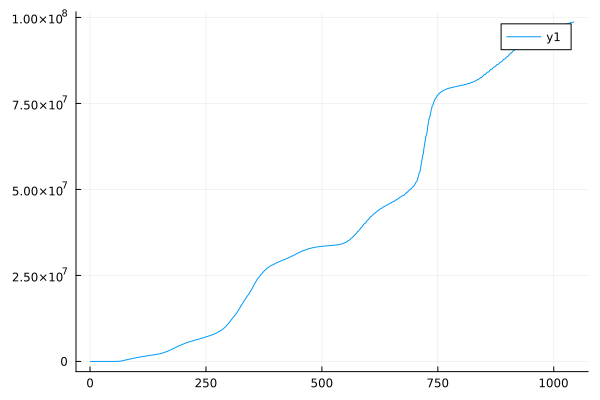

In [97]:
using Plots
plot(US_data)

In [92]:
date_strings = String.(names(data))[5:end]


1043-element Vector{String}:
 "1/22/20"
 "1/23/20"
 "1/24/20"
 "1/25/20"
 "1/26/20"
 "1/27/20"
 "1/28/20"
 "1/29/20"
 "1/30/20"
 "1/31/20"
 "2/1/20"
 "2/2/20"
 "2/3/20"
 ⋮
 "11/18/22"
 "11/19/22"
 "11/20/22"
 "11/21/22"
 "11/22/22"
 "11/23/22"
 "11/24/22"
 "11/25/22"
 "11/26/22"
 "11/27/22"
 "11/28/22"
 "11/29/22"

In [98]:
using Dates

In [120]:
dates = Date.(date_strings, Dates.DateFormat("m/d/y")) .+Year(2000)

1043-element Vector{Date}:
 2020-01-22
 2020-01-23
 2020-01-24
 2020-01-25
 2020-01-26
 2020-01-27
 2020-01-28
 2020-01-29
 2020-01-30
 2020-01-31
 2020-02-01
 2020-02-02
 2020-02-03
 ⋮
 2022-11-18
 2022-11-19
 2022-11-20
 2022-11-21
 2022-11-22
 2022-11-23
 2022-11-24
 2022-11-25
 2022-11-26
 2022-11-27
 2022-11-28
 2022-11-29

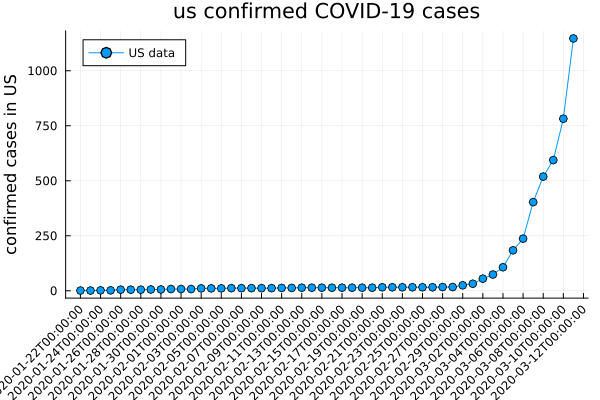

In [129]:
plot(dates[1:50], US_data[1:50], xticks=dates[1:2:end], xrotation = 45, leg=:topleft, label="US data", m = :o)

xlabel!("date")
ylabel!("confirmed cases in US")
title!("us confirmed COVID-19 cases")

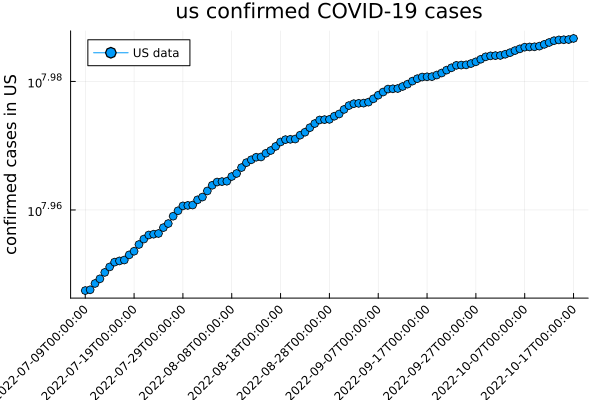

In [133]:
plot(dates[900:1000], US_data[900:1000], xticks=dates[900:10:end], xrotation = 45, leg=:topleft, label="US data", m = :o, yscale=:log10)

xlabel!("date")
ylabel!("confirmed cases in US")
title!("us confirmed COVID-19 cases")

## function 

In [142]:
countries = collect(data[:, 2])

289-element Vector{String}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antarctica"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 ⋮
 "United Kingdom"
 "United Kingdom"
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela"
 "Vietnam"
 "West Bank and Gaza"
 "Winter Olympics 2022"
 "Yemen"
 "Zambia"
 "Zimbabwe"

In [143]:
all_countries = unique(countries)

201-element Vector{String}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antarctica"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Austria"
 "Azerbaijan"
 "Bahamas"
 ⋮
 "United Arab Emirates"
 "United Kingdom"
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela"
 "Vietnam"
 "West Bank and Gaza"
 "Winter Olympics 2022"
 "Yemen"
 "Zambia"
 "Zimbabwe"

In [144]:
each_countries=["China", "South Korea", "US", "France"]

4-element Vector{String}:
 "China"
 "South Korea"
 "US"
 "France"

In [145]:
num_days = dates[end] - dates[1]

1042 days

In [146]:
zeros(201)

201-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [148]:
using DiffEqParamEstim, OrdinaryDiffEq, DiffEqParamEstim, JuMP, NLopt, Plots

In [ ]:
using DifferentialEquations
α=1
β=1
u₀=1/2
f(u,p,t) = α*u
g(u,p,t) = β*u
dt = 1//2^(4)
tspan = (0.0,1.0)
prob = SDEProblem(f,g,u₀,(0.0,1.0))


In [149]:
function f(du,u,p,t)
    du[1] = dx = p[1]*u[1] - u[1]*u[2]
    du[2] = dy = -3*u[2] + u[1]*u[2]
end
  
u0 = [1.0;1.0]
tspan = (0.0,10.0)
p = [1.5]
prob = ODEProblem(f,u0,tspan,p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 1.0
 1.0

In [150]:
sol = solve(prob,Tsit5())
t = collect(range(0,stop=10,length=200))
using RecursiveArrayTools # for VectorOfArray
randomized = VectorOfArray([(sol(t[i]) + .01randn(2)) for i in 1:length(t)])
data = convert(Array,randomized)

LoadError: ArgumentError: Package RecursiveArrayTools not found in current path, maybe you meant `import/using .RecursiveArrayTools`.
- Otherwise, run `import Pkg; Pkg.add("RecursiveArrayTools")` to install the RecursiveArrayTools package.